In [1]:
import numpy as np
import pandas as pd

# Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Group data by 'phone service' and 'Internet service' and calculate churn counts
service_churn_data = df.groupby(['PhoneService', 'InternetService', 'Churn'])['customerID'].count().unstack().reset_index()
service_churn_data

Churn,PhoneService,InternetService,No,Yes
0,No,DSL,512,170
1,Yes,DSL,1450,289
2,Yes,Fiber optic,1799,1297
3,Yes,No,1413,113


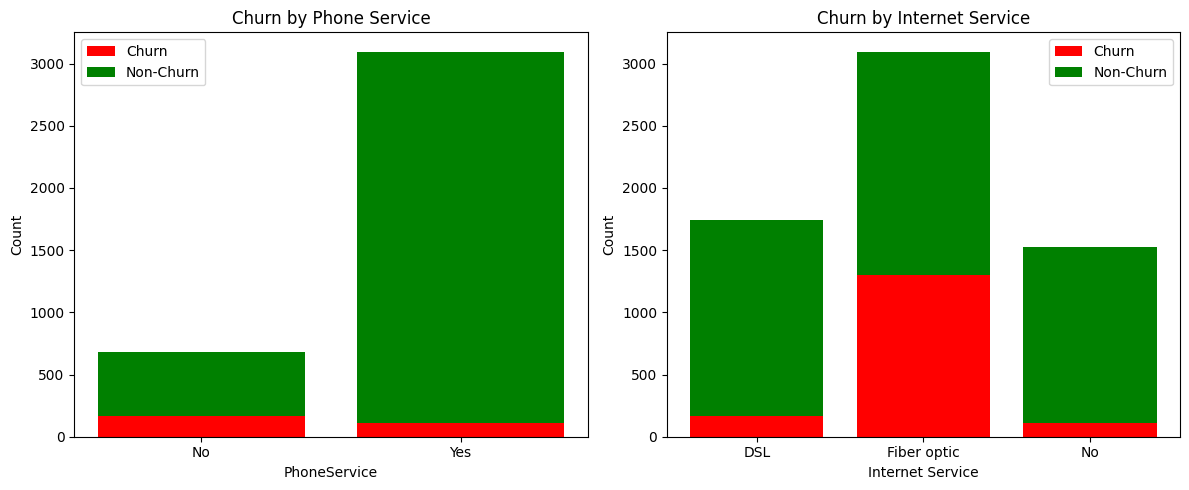

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for phone service
ax[0].bar(service_churn_data['PhoneService'], service_churn_data['Yes'], label='Churn', color='red')
ax[0].bar(service_churn_data['PhoneService'], service_churn_data['No'], label='Non-Churn', color='green', bottom=service_churn_data['Yes'])
ax[0].set_xlabel('PhoneService')
ax[0].set_ylabel('Count')
ax[0].set_title('Churn by Phone Service')
ax[0].legend()

# Bar chart for Internet service
ax[1].bar(service_churn_data['InternetService'], service_churn_data['Yes'], label='Churn', color='red')
ax[1].bar(service_churn_data['InternetService'], service_churn_data['No'], label='Non-Churn', color='green', bottom=service_churn_data['Yes'])
ax[1].set_xlabel('Internet Service')
ax[1].set_ylabel('Count')
ax[1].set_title('Churn by Internet Service')
ax[1].legend()


plt.tight_layout()
plt.show()

**In the 'phone service' chart**:

- For customers with phone service who did not churn (green), the green bar is significantly taller than the red bar. This suggests that a substantial number of customers with phone service are loyal and have not churned.

- For customers without phone service (represented by the 'No' category on the x-axis), while there are more customers without phone service compared to those with phone service, the green bar for non-churn is still higher than the red bar for churn. This indicates that, even among those without phone service, a significant portion has not churned, and the absence of phone service is associated with a lower churn rate.

In summary, the chart illustrates that customers with phone service, as well as some customers without phone service, are less likely to churn, as indicated by the taller green bars (non-churn) compared to the red bars (churn). This suggests that both groups have a relatively lower churn rate, with a particularly strong retention rate among customers with phone service.

**Observation**

- significant number of customers with "Fiber optic Internet Service" have churned compared to DSL.
